# Step 1: Install Libraries (Run this once)

In [14]:
!pip install pandas numpy matplotlib seaborn plotly

# Step 2: Imports and Load Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

# Load the dataset

df = pd.read_csv("Unemployment in India.csv")

# FIX: The dataset has extra spaces in column names (e.g., " Region"). This fixes it.
df.columns = df.columns.str.strip()

print("Data loaded successfully!")
df.head()

Data loaded successfully!


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Step 3: Data Cleaning
    # This formats the dates correctly so we can analyze by month.

In [17]:
# Check for missing values and drop them
df = df.dropna()

# Convert the 'Date' column to a proper date format
df['Date'] = pd.to_datetime(df['Date'])

# Add separate Month and Year columns for easier analysis
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

import warnings
warnings.filterwarnings('ignore')

print("Data cleaned and ready.")
df.info()

Data cleaned and ready.
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
 7   Month                                    740 non-null    object        
 8   Year                                     740 non-null    int32         
dtypes: datetime64[ns](1), flo

# Step 4: Correlation Heatmap
    # This cell visualizes how the different numbers (like Employment vs. Unemployment) relate to each other.


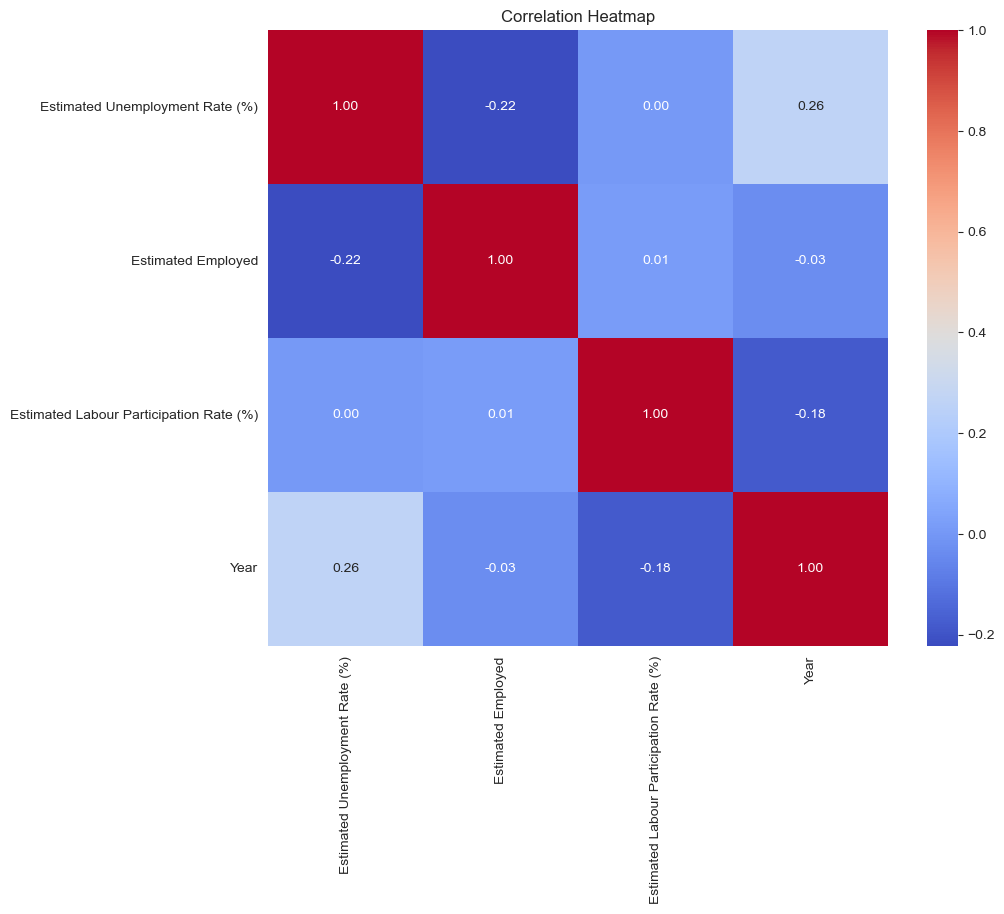

In [18]:
# Calculate correlations
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Unemployment by State (Bar Chart)
    # This creates the main visual showing which states had the highest unemployment.

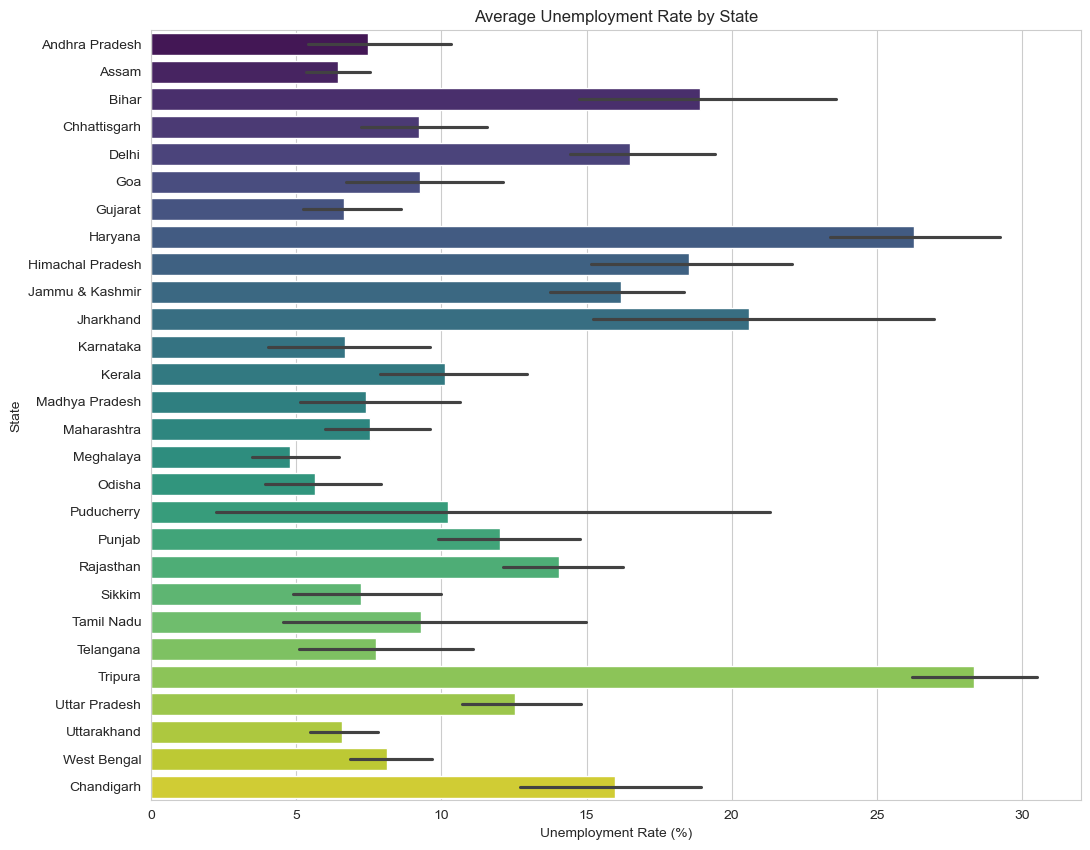

In [19]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=df, palette='viridis')
plt.title("Average Unemployment Rate by State")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.show()

# Step 6: Rural vs. Urban Analysis
    # See the difference between city and village areas.

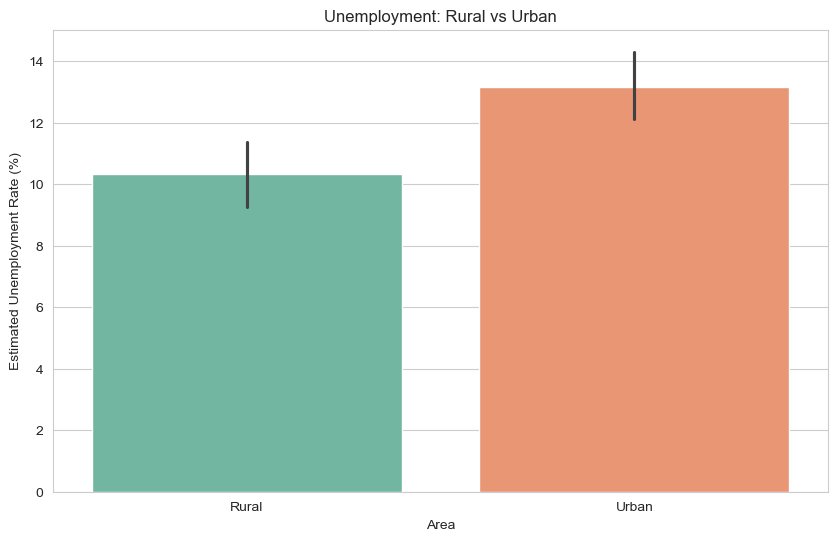

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Estimated Unemployment Rate (%)', data=df, palette='Set2')
plt.title("Unemployment: Rural vs Urban")
plt.show()

# Step 7: The Final Project Report

# Unemployment Analysis in India

## 1. Objective
To analyze the unemployment rate in India, focusing on the differences between Rural and Urban areas and comparing rates across different states.

## 2. Dataset
The dataset includes monthly unemployment data for all Indian states.
* **Key Metrics:** Estimated Unemployment Rate (%), Estimated Employed, and Labour Participation Rate.
* **Scope:** The data covers both Rural and Urban areas.

## 3. Key Findings
* **State Disparity:** Certain states show significantly higher unemployment rates than others.
* **Rural vs Urban:** There is a notable difference in unemployment stability between rural and urban sectors.
* **Correlations:** As expected, higher unemployment rates correlate negatively with the number of estimated employed people.

## 4. Conclusion
Visualizing this data helps identify regions that require more economic support and highlights the differing economic realities of rural versus urban India.